In [22]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# baca dataset
df = pd.read_csv('R01_students_performance.csv')
df.sample(5)

,Study Hours (X),Exam Scores (Y)
34,2.7,71
9,4.5,95
42,3.7,73
3,3.0,75
24,4.1,90


In [24]:
# melihat informasi dataset
df.describe()

,Study Hours (X),Exam Scores (Y)
count,50.000000,50.000000
mean,3.006000,76.480000
std,0.860567,11.051346
min,1.500000,58.000000
25%,2.300000,68.000000
50%,3.000000,75.500000
75%,3.700000,86.500000
max,4.500000,95.000000


In [25]:
# data preprocessing

# cek jika ada data null atau NaN
df.isnull().sum()

Study Hours (X)    0
Exam Scores (Y)    0
dtype: int64

In [28]:
# cek data terduplikat
df.duplicated().sum()

1

In [30]:
# drop data duplikat
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# split data menjadi fitur dan target
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Bagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresi Linear
lr_model = LinearRegression()

# Latih model
lr_model.fit(X_train, y_train)

# Prediksi di data uji
y_pred = lr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print coefficients dan metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Squared Error (MSE): 12.631378007629054
R-squared (R2): 0.8528192619514998
Root Mean Squared Error (RMSE): 3.5540649976652166
Mean Absolute Percentage Error (MAPE): 3.231098384504775


In [34]:
# uji pada data test
df_test = pd.DataFrame({'X': X_test['Study Hours (X)'], 'Y': y_test, 'Predicted (Y)': y_pred})
df_test.sample(15)

,X,Y,Predicted (Y)
31,2.6,74,71.442060
26,2.4,68,68.979011
4,2.0,62,64.052914
44,4.1,95,89.914923
48,3.3,70,80.062729
8,1.8,63,61.589866
19,3.5,82,82.525778
13,4.0,88,88.683399
34,2.7,71,72.673584
25,3.3,80,80.062729


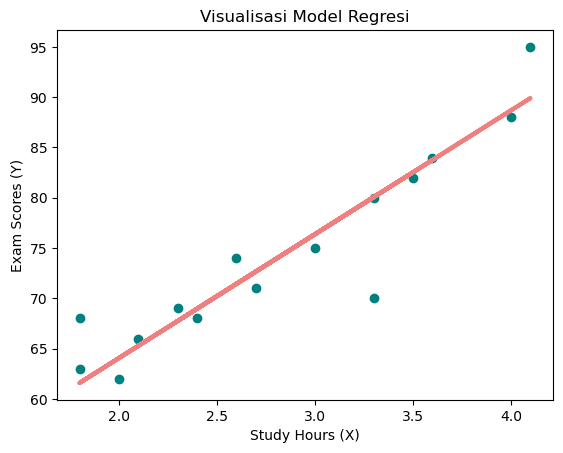

In [36]:
# Plot grafik regresi
plt.scatter(X_test, y_test, color='teal')
plt.plot(X_test, y_pred, color='lightcoral', linewidth=3)
plt.xlabel('Study Hours (X)')
plt.ylabel('Exam Scores (Y)')
plt.title('Visualisasi Model Regresi')
plt.show()